# **Importing Required Libraries**

In [ ]:
pip install keras --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from keras.optimizers import Adam
from sklearn.utils import shuffle
from keras.layers import Dense, SimpleRNN
from keras.layers import Dense, Conv1D, GlobalMaxPooling1D


# **Data Collections**

In [ ]:
df= pd.read_csv('dataset22.csv', on_bad_lines='skip')
df1 = df

In [ ]:
df.head()

,Class,Method,User-Agent,Pragma,Cache-Control,Accept,Accept-encoding,Accept-charset,language,host,cookie,content-type,connection,lenght,content,classification,URL
0,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/index.jsp HTTP/1.1
1,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/publico/anadir.j...
2,Normal,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=933185092E0B668B90676E0A2B0767AF,application/x-www-form-urlencoded,Connection: close,Content-Length: 68,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...,0,http://localhost:8080/tienda1/publico/anadir.j...
3,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/publico/autentic...
4,Normal,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2,application/x-www-form-urlencoded,Connection: close,Content-Length: 63,modo=entrar&login=choong&pwd=d1se3ci%F3n&remem...,0,http://localhost:8080/tienda1/publico/autentic...


In [ ]:
df.shape

(10102, 17)

In [ ]:
lb  = tuple(df['Class'])
anomaly  = 0
normal = 0
for x in lb:
   if(x=='Normal'):
     normal+=1
anomaly = len(lb)-normal

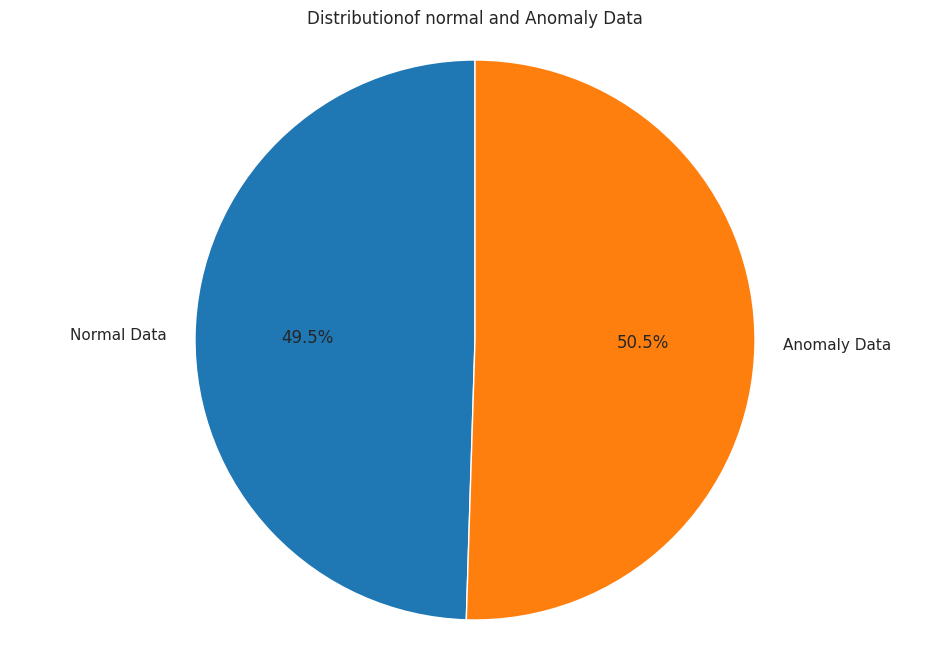

In [ ]:

per_normal = normal/len(lb)*100
per_anomaly = anomaly/len(lb)*100

labels = ['Normal Data','Anomaly Data']
sizes = [per_normal,per_anomaly]
colors =  ['#1f77b4','#ff7f0e']
fig,ax = plt.subplots()
ax.pie(sizes,labels =  labels,colors = colors,autopct = '%1.1f%%',startangle = 90)
ax.axis('equal')
ax.set_title('Distributionof normal and Anomaly Data')
plt.show()

# **Data Cleaning**

In [ ]:
df.dtypes

Class              object
Method             object
User-Agent         object
Pragma             object
Cache-Control      object
Accept             object
Accept-encoding    object
Accept-charset     object
language           object
host               object
cookie             object
content-type       object
connection         object
lenght             object
content            object
classification      int64
URL                object
dtype: object

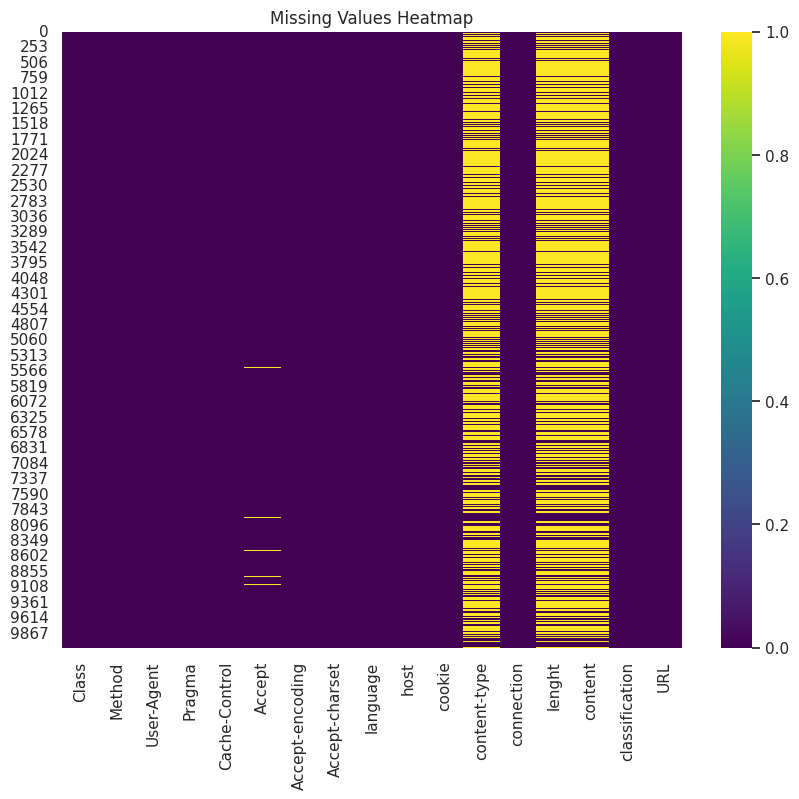

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
single_value_cols = [col for col in df.columns if df[col].nunique() == 1]
print("============================Columns That Contain only Single Values===================================")
print(single_value_cols)

============================Columns That Contain only Single Values===================================
['User-Agent', 'Pragma', 'Cache-Control', 'Accept', 'Accept-encoding', 'Accept-charset', 'language', 'content-type']


In [ ]:
df = df.drop(single_value_cols,axis = 1)

In [ ]:
df.isnull().sum()

Class                0
Method               0
host                 0
cookie               0
connection           0
lenght            6953
content           6953
classification       0
URL                  0
dtype: int64

# **Data Encoding**

In [ ]:
enc  = OrdinalEncoder()

In [ ]:
for column in df.columns:
  df[column] = enc.fit_transform(df[[column]])

In [ ]:
df.head()

,Class,Method,host,cookie,connection,lenght,content,classification,URL
0,1.0,0.0,0.0,1238.0,1.0,NaN,NaN,0.0,397.0
1,1.0,0.0,0.0,5155.0,1.0,NaN,NaN,0.0,1342.0
2,1.0,1.0,0.0,5847.0,0.0,235.0,562.0,0.0,964.0
3,1.0,0.0,0.0,5703.0,1.0,NaN,NaN,0.0,1514.0
4,1.0,1.0,0.0,4498.0,0.0,229.0,750.0,0.0,1409.0


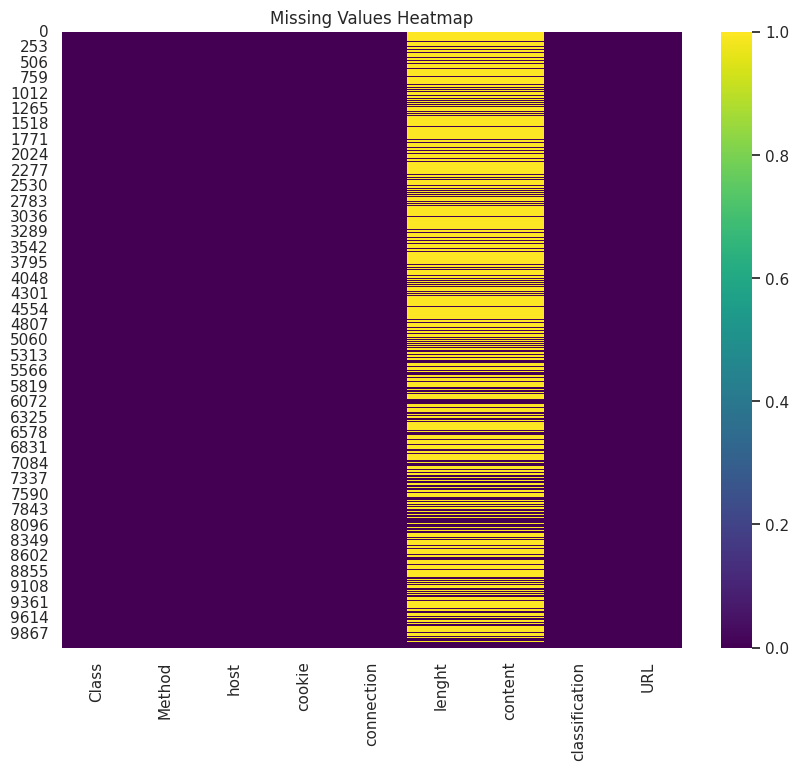

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
lenght_mean = df['lenght'].mean(skipna= True)
content_mean = df['content'].mean(skipna = True)
df['lenght'].fillna(lenght_mean,inplace = True)
df['content'].fillna(content_mean,inplace = True)

In [ ]:
df.isnull().sum()

Class             0
Method            0
host              0
cookie            0
connection        0
lenght            0
content           0
classification    0
URL               0
dtype: int64

# **Data Normalization**

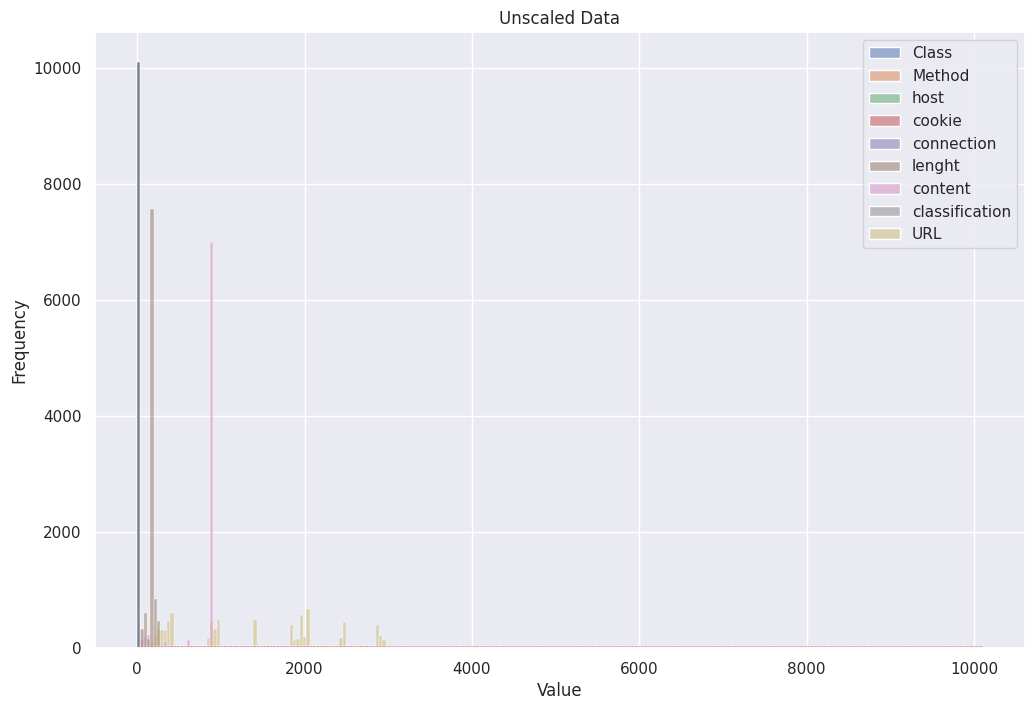

In [ ]:
sns.set(rc = {'figure.figsize':(12,8)})

sns.histplot(df)
plt.title("Unscaled Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
for column in df.columns:
	df[column] = (df[column] -
						df[column].mean()) / df[column].std()

display(df)


,Class,Method,host,cookie,connection,lenght,content,classification,URL
0,1.009899,-0.663130,-0.082925,-1.307289,0.672944,7.345302e-16,2.800731e-16,-1.009899,-1.110688
1,1.009899,-0.663130,-0.082925,0.035833,0.672944,7.345302e-16,2.800731e-16,-1.009899,-0.040413
2,1.009899,1.418579,-0.082925,0.273116,-1.485861,1.821299e+00,-8.150639e-01,-1.009899,-0.468523
3,1.009899,-0.663130,-0.082925,0.223739,0.672944,7.345302e-16,2.800731e-16,-1.009899,0.154389
4,1.009899,1.418579,-0.082925,-0.189450,-1.485861,1.666235e+00,-3.519167e-01,-1.009899,0.035469
...,...,...,...,...,...,...,...,...,...
10097,-0.990100,1.418579,-0.082925,0.615669,-1.485861,1.304419e+00,-1.837437e+00,0.990100,0.534931
10098,-0.990100,-0.663130,-0.082925,0.445593,0.672944,7.345302e-16,2.800731e-16,0.990100,0.636862
10099,-0.990100,1.418579,-0.082925,0.307063,-1.485861,1.175199e+00,-6.721781e-01,0.990100,0.534931
10100,-0.990100,-0.663130,-0.082925,0.104755,0.672944,7.345302e-16,2.800731e-16,0.990100,-0.482113


In [ ]:
data1 = df
data2 = df
data3 = df

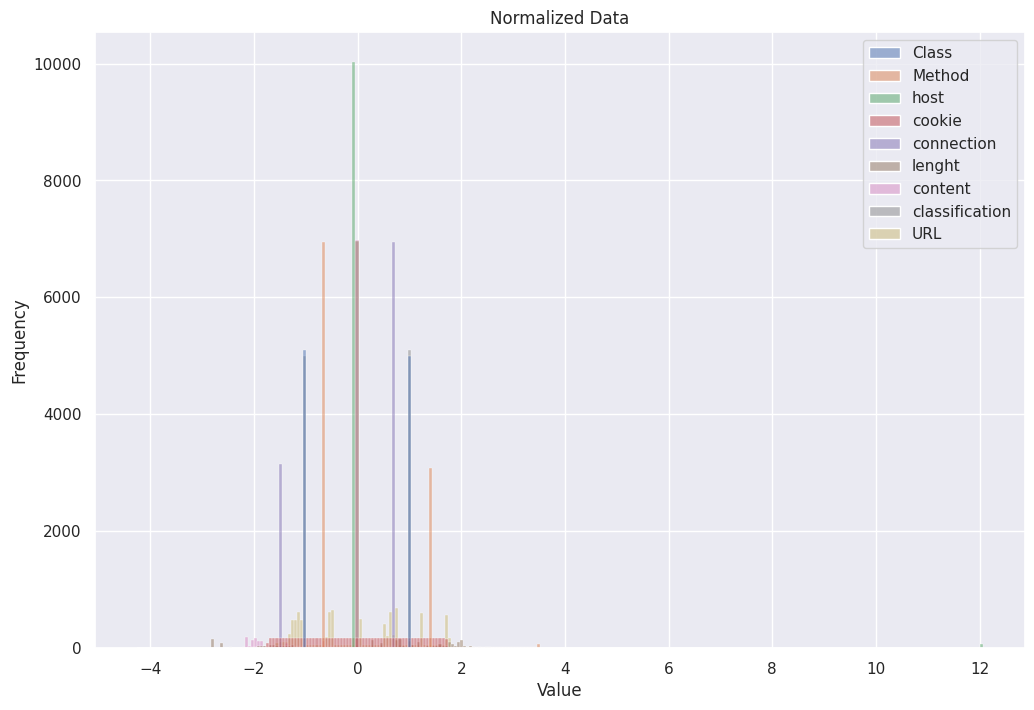

In [ ]:
sns.set(rc = {'figure.figsize':(12,8)})

sns.histplot(df)
plt.title("Normalized Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# **Covariance Matrix**

In [ ]:
corr  = df.corr()
corr

,Class,Method,host,cookie,connection,lenght,content,classification,URL
Class,1.000000,-0.198288,-0.082113,-0.011436,1.910305e-01,-1.447217e-02,-4.037263e-02,-1.000000,-0.160666
Method,-0.198288,1.000000,0.290292,-0.006607,-9.854169e-01,-2.416668e-04,-3.458334e-03,0.198288,0.250057
host,-0.082113,0.290292,1.000000,-0.004115,-1.232279e-01,-1.409428e-03,-2.016939e-02,0.082113,0.045936
cookie,-0.011436,-0.006607,-0.004115,1.000000,6.119567e-03,1.747630e-04,8.129586e-03,0.011436,0.000425
connection,0.191031,-0.985417,-0.123228,0.006120,1.000000e+00,1.840740e-16,1.126987e-18,-0.191031,-0.251149
lenght,-0.014472,-0.000242,-0.001409,0.000175,1.840740e-16,1.000000e+00,-2.165494e-01,0.014472,-0.083071
content,-0.040373,-0.003458,-0.020169,0.008130,1.126987e-18,-2.165494e-01,1.000000e+00,0.040373,-0.126344
classification,-1.000000,0.198288,0.082113,0.011436,-1.910305e-01,1.447217e-02,4.037263e-02,1.000000,0.160666
URL,-0.160666,0.250057,0.045936,0.000425,-2.511493e-01,-8.307054e-02,-1.263436e-01,0.160666,1.000000


<Axes: title={'center': 'Correlation Matrix'}>

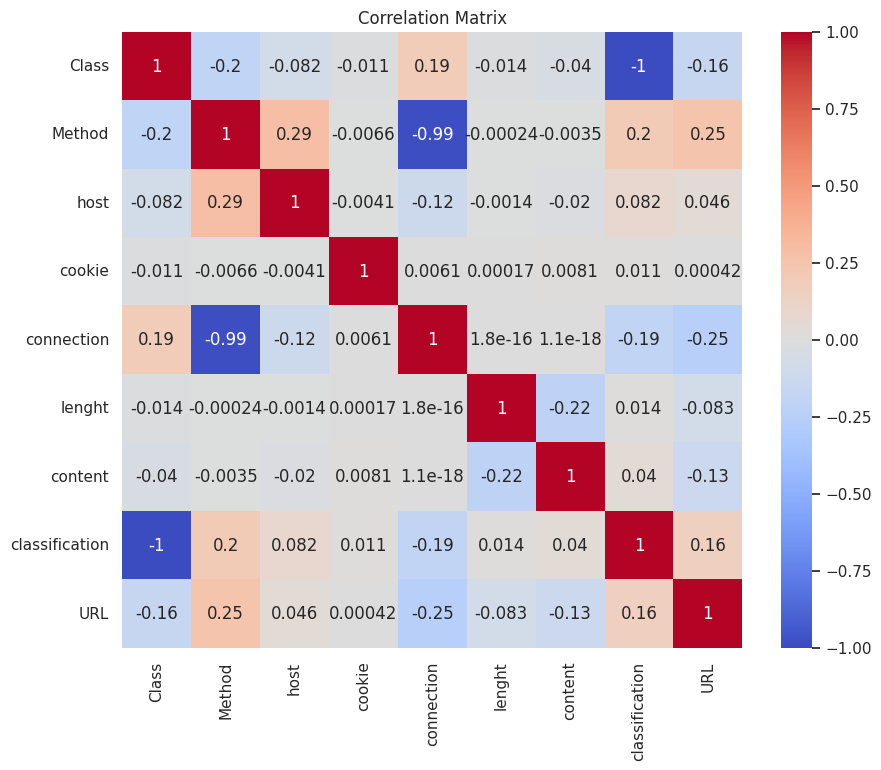

In [ ]:
plt.figure(figsize = (10,8))
plt.title("Correlation Matrix")
sns.heatmap(corr,annot = True,cmap = 'coolwarm')

# **ANN Model Training And Testings**

In [ ]:
encoder = LabelEncoder()

In [ ]:
data  = df
data = shuffle(data)
data['Class'] = encoder.fit_transform(data['Class'])
X = data.drop('Class', axis=1)
X = X.values
y = data['Class']
acc = []
loss = []

In [ ]:
from sklearn.decomposition import PCA
n_components = 2
pca = PCA(n_components=n_components)
X = pca.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model_ann = Sequential()
model_ann.add(Dense(64, activation='relu', input_dim=X.shape[1]))
model_ann.add(Dropout(0.2))
model_ann.add(Dense(32, activation='relu'))
model_ann.add(Dropout(0.2))
model_ann.add(Dense(1, activation='sigmoid'))

In [ ]:
adam =  Adam()
model_ann.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print("-------------------------------------------------------------Training----------------------------------------------------------------------")
model_ann.fit(X_train, y_train,batch_size=32)
score = model_ann.evaluate(X_test, y_test,verbose=1)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

acc.append(score[1])
loss.append(score[0])
print("--------------------------------------------------------------Testing-----------------------------------------------------------------------")
test_predictions = np.round(model_ann.predict(X_test)).flatten()

test_accuracy = accuracy_score(test_predictions, y_test)

test_confusion_matrix = confusion_matrix(test_predictions,y_test)



print("Test Accuracy  = ",test_accuracy)


-------------------------------------------------------------Training----------------------------------------------------------------------
64/64 [==============================] - 1s 3ms/step - loss: 0.3797 - accuracy: 0.8694
Train loss: 0.3796866238117218
Train accuracy: 0.8693715929985046
--------------------------------------------------------------Testing-----------------------------------------------------------------------
64/64 [==============================] - 0s 2ms/step
Test Accuracy  =  0.8693715982187036


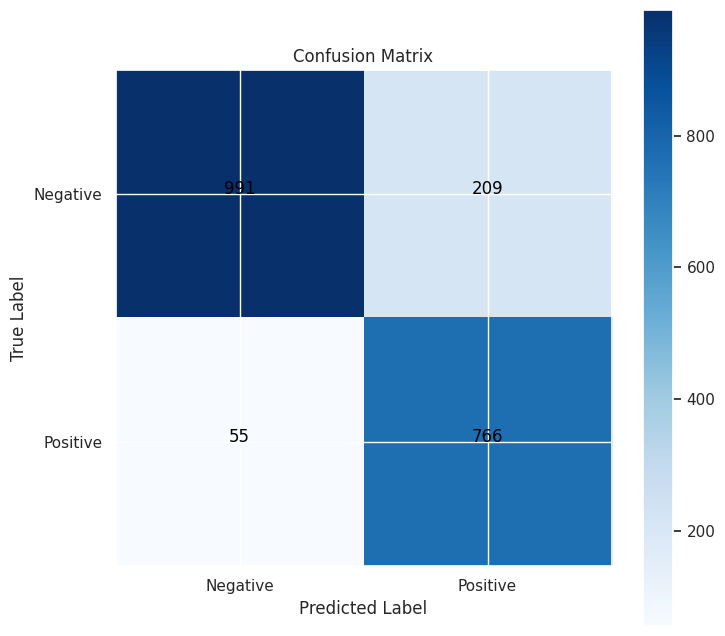

In [ ]:
plt.figure(figsize = (8,8))
plt.imshow(test_confusion_matrix, cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0, 1], ["Negative", "Positive"])
plt.yticks([0, 1], ["Negative", "Positive"])

thresh = test_confusion_matrix.max() / 2.
for i in range(test_confusion_matrix.shape[0]):
    for j in range(test_confusion_matrix.shape[1]):
        plt.text(j, i, test_confusion_matrix[i, j],
                horizontalalignment="center",
                 color="black" if test_confusion_matrix[i, j] > thresh else "black")

plt.colorbar()

plt.show()

# **CNN Model Training And Testings**

In [ ]:
data1 = shuffle(data1)
data1['Class'] = encoder.fit_transform(data1['Class'])
X1 = data1.drop('Class', axis=1)
y1 = data1['Class']
X1 = X1.values

In [ ]:
X1 = X1.reshape(X1.shape[0], X1.shape[1], 1)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2)
X_train11, X_test11, y_train11, y_test11 = train_test_split(X1, y1, test_size=0.2)

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv1D(64, 5, activation='relu', input_shape=(X_train1.shape[1], 1)))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(32, activation='relu'))
model_cnn.add(Dropout(0.2))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(1, activation='sigmoid'))

In [ ]:
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print("-------------------------------------------------------------Training----------------------------------------------------------------------")
model_cnn.fit(X_train1, y_train1, batch_size=32, validation_data=(X_test1, y_test1))
score = model_cnn.evaluate(X_test1, y_test1, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
acc.append(score[1])
loss.append(score[0])
print("-------------------------------------------------------------Testing----------------------------------------------------------------------")



test_predictions = np.round(model_cnn.predict(X_test1)).flatten()
test_accuracy = accuracy_score(y_test1, test_predictions)
test_confusion_matrix = confusion_matrix(y_test1, test_predictions)


print("Accuracy = ",test_accuracy)

-------------------------------------------------------------Training----------------------------------------------------------------------
253/253 [==============================] - 7s 16ms/step - loss: 0.3599 - accuracy: 0.8853 - val_loss: 0.1430 - val_accuracy: 0.9668
Train loss: 0.14297589659690857
Train accuracy: 0.9668480753898621
-------------------------------------------------------------Testing----------------------------------------------------------------------
64/64 [==============================] - 1s 8ms/step
Accuracy =  0.966848095002474


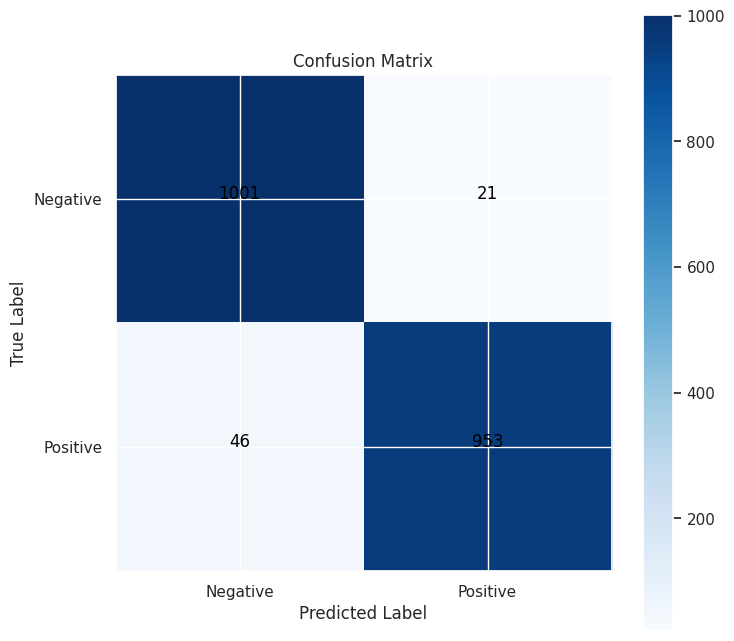

In [ ]:
plt.figure(figsize = (8,8))
plt.imshow(test_confusion_matrix, cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0, 1], ["Negative", "Positive"])
plt.yticks([0, 1], ["Negative", "Positive"])

thresh = test_confusion_matrix.max() / 2.
for i in range(test_confusion_matrix.shape[0]):
    for j in range(test_confusion_matrix.shape[1]):
        plt.text(j, i, test_confusion_matrix[i, j],
                horizontalalignment="center",
                 color="Black" if test_confusion_matrix[i, j] > thresh else "black")

plt.colorbar()

plt.show()

# **RNN Model Training And Testings**

In [ ]:
data2 = shuffle(data2)
data2['Class'] = encoder.fit_transform(data2['Class'])
X2 = data2.drop('Class', axis=1)
y2 = data2['Class']

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)
X_train22, X_test22, y_train22, y_test22 = train_test_split(X2, y2, test_size=0.3)

In [ ]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=32, activation='relu', input_shape=(X_train2.shape[1], 1)))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(64, activation='relu'))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(units=1, activation='sigmoid'))

In [ ]:
print("---------------------------------------------Training--------------------------------------------------------")
#adam =  Adam(lr = 0.1,beta_1 = 0.7,beta_2  = 0.77)
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_rnn.fit(X_train2.values.reshape((X_train2.shape[0], X_train2.shape[1], 1)), y_train2, batch_size=32)

loss_score, accuracy = model_rnn.evaluate(X_test22.values.reshape((X_test22.shape[0], X_test22.shape[1], 1)), y_test22)
print("Train Loss:",loss_score)
print(f"Train Accuracy:", accuracy)
loss.append(loss_score)
acc.append(accuracy)
#print("---------------------------------------------Testing--------------------------------------------------------")
test_predictions = np.round(model_rnn.predict(X_test22)).flatten()
test_accuracy = accuracy_score(y_test22, test_predictions)
test_confusion_matrix = confusion_matrix(y_test22, test_predictions)


print(test_accuracy)

---------------------------------------------Training--------------------------------------------------------
95/95 [==============================] - 1s 4ms/step - loss: 2.6681e-04 - accuracy: 1.0000
Train Loss: 0.00026681096642278135
Train Accuracy: 1.0
95/95 [==============================] - 1s 5ms/step
1.0


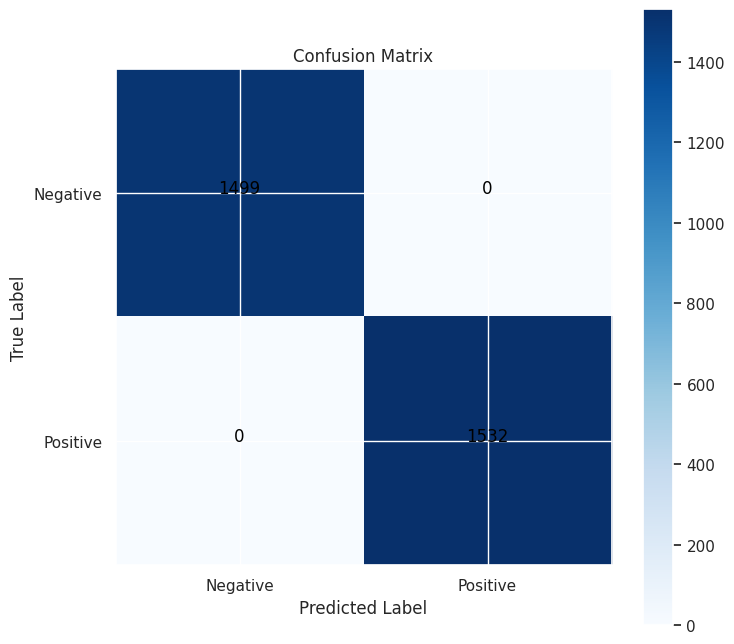

In [ ]:
plt.figure(figsize = (8,8))
plt.imshow(test_confusion_matrix, cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0, 1], ["Negative", "Positive"])
plt.yticks([0, 1], ["Negative", "Positive"])

thresh = test_confusion_matrix.max() / 2.
for i in range(test_confusion_matrix.shape[0]):
    for j in range(test_confusion_matrix.shape[1]):
        plt.text(j, i, test_confusion_matrix[i, j],
                horizontalalignment="center",
                 color="Black" if test_confusion_matrix[i, j] > thresh else "black")

plt.colorbar()

plt.show()

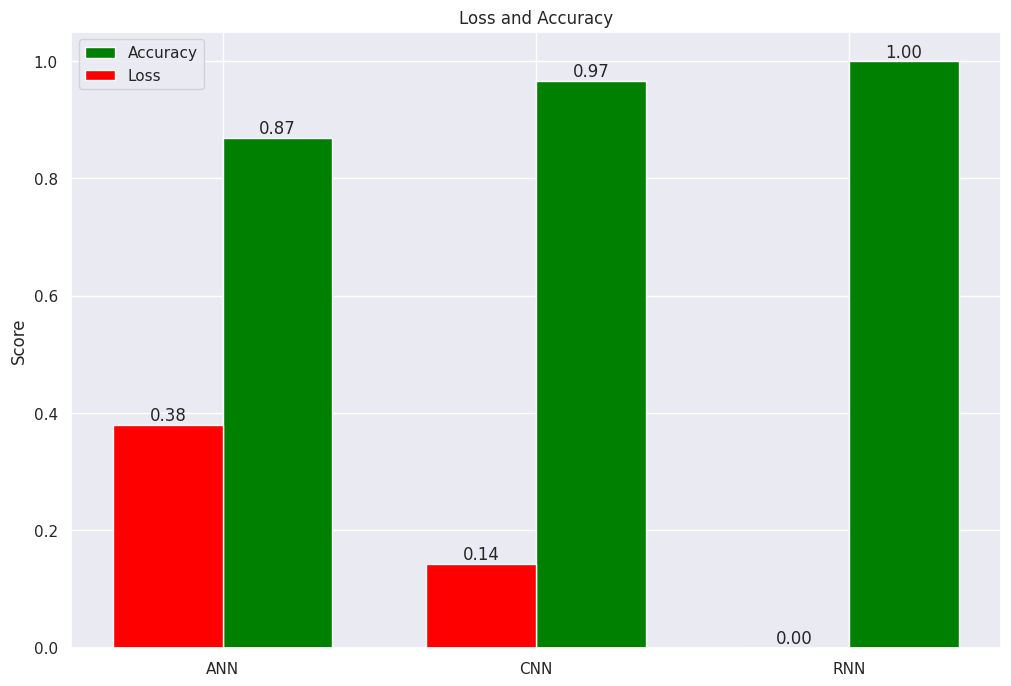

In [ ]:
categories = ['ANN', 'CNN', 'RNN']

bar_width = 0.35
index = [1,2,3]
fig, ax = plt.subplots()
bar2 = ax.bar([i + bar_width for i in index], acc, bar_width, label='Accuracy',color = 'green')
bar1 = ax.bar(index, loss, bar_width, label='Loss',color = 'red')

ax.set_ylabel('Score')
ax.set_title('Loss and Accuracy')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(categories)
ax.legend()

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center')
add_labels(bar2)
add_labels(bar1)

plt.show()

